## Lab-8: Convolutions and CNN

```
- Machine Learning, Innopolis University (Fall semester 2021)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice Convolutions and CNN in Pytorch.

Lab Plan
1. Convolutions - application examples:
    - edge detection    
    - negation
    - blurring
    - sharpening
2. Building CNN in PyTorch
    - example CNN
    - comparing with Fully-connected NN

```

<hr>

### Recap

1. What is the use of convolutions? (In general)
2. Why use convolutional layers instead of fully-connected ones?


## Convolutions
Let's upload some image (you can try your own image changing the url)

In [1]:
import urllib.request
url = "https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/lss423kothpqpjpwbzg0"
filename = 'grid_img.jpg'
urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x1c720856320>)

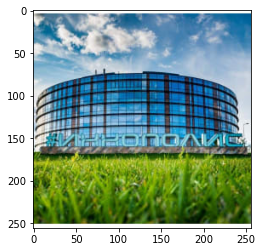

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# Let's read and plot the image
image = plt.imread('grid_img.jpg')
plt.imshow(image)

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


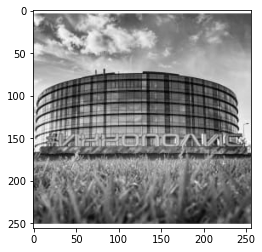

In [3]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

In [4]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1], 
                              [0, 0, 0], 
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')
 
vertical_kernel = np.array([[-1, 0, 1], 
                            [-1, 0, 1], 
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

Horizontal kernel applied


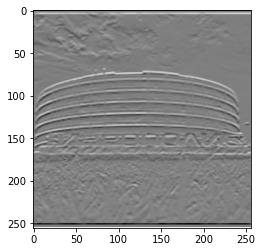

In [5]:
# apply kernel on input image such that the image size is preserved
def convolve(img, kernel):
        w, h = img.shape[0], img.shape[1]
        f = kernel.shape[0]
        if (f - 1) % 2 !=0 :
            print("failure to choose apt padding, choose another filter size!")
        padding = (f - 1)//2
        padded_img = np.lib.pad(img, ((padding, padding), (padding, padding)), 'constant', constant_values = ((0,0),(0,0)))
        result = np.zeros(img.shape)
        for i in range(h):
            for j in range(w):
                # we chose padding size such that when sliding through the padded image
                # with the kernel we obtain exactly same dimensionality (w x h)
                result[i,j] = np.sum(padded_img[i:i + f, j:j+f] * kernel)                 
        return result

c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')

Vertical kernel applied


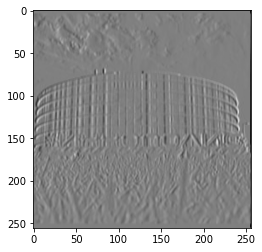

In [6]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Your kernel applied


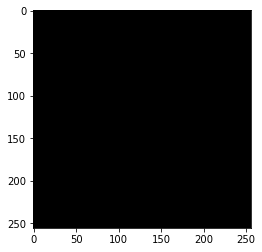

In [7]:
# TODO: play with numbers, see how changing the kernel affects the result
your_kernel = None

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

Negative kernel applied


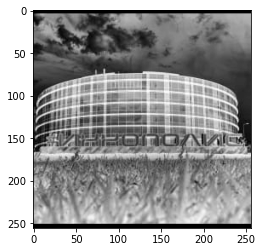

In [9]:
# Define the kernel that will result in reversed image, in which the lightest areas of
# the photographed subject appear darkest and the darkest areas appear the lightest.
negative_kernel = np.array([[-1]])

c = convolve(gray_image, negative_kernel)
print("Negative kernel applied")
plt.imshow(c, cmap='gray')

Blur kernel applied


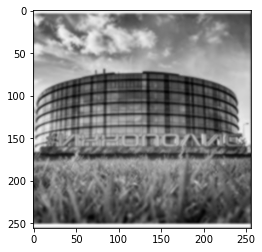

In [10]:
# Define the kernel that will result in a blurred image
# How can we control the degree of blur?
v1 = 0.5
v = 0.1
# this is an example of ~ gaussian blur
blur_kernel = np.array([[v, v, v, v, v], 
                        [v, v1, v1, v1, v],
                        [v, v1, 2, v1, v],
                        [v, v1, v1, v1, v],
                        [v, v, v, v, v]])

#simple sum
blur_kernel2 = np.ones((11,11))

c_blurred = convolve(gray_image, blur_kernel)
print("Blur kernel applied")
plt.imshow(c_blurred, cmap='gray')

Sharpen kernel applied


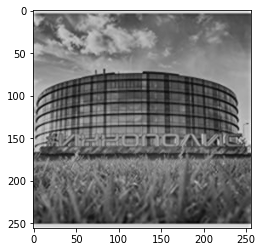

In [11]:
# Now let's sharpen the blurred image back 
sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

c = convolve(c_blurred, sharpen_kernel)
print("Sharpen kernel applied")
plt.imshow(c, cmap='gray')

## CNN with PyTorch

### 1. Data Loading

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

batch_size = 32
test_batch_size = 100

# Transformations
data_transformations = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])

# Data Source
mnist_train = datasets.MNIST('../data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('../data', train=False,
                            transform=data_transformations)


# Data loaders
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=True)

## 2.1 CNN model

In [13]:
class Net(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1
        
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) 
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # TODO: calclulate shape after each layer
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = Net().to(device)

## 2.2 Fully-conected model from the last class

### Task : Define the fully connected model layers (Same as last lab)

In [14]:
class FC_Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = None 
        self.fc2 = None
        self.fc3 = None
        self.fc4 = None

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_nn = FC_Net().to(device)

In [15]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [16]:
# Let's compare the number of parameters of these models:
print("Number of params in the Fully-connected model:", count_parameters(model_nn))
print("Number of params in the CNN model:", count_parameters(model_cnn))
      

Number of params in the Fully-connected model: 22250
Number of params in the CNN model: 21840


### Task: Try changing the fully-connected model to have the same number of parameters as CNN and compare the resulting performance 

## 3. Training and testing

In [17]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
            
def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 700

# training CNN model
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

In [ ]:
# training the fully-connected model

model = model_nn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_nn.pt")